In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
from read_and_clean import read_and_clean



In [8]:
orders_df = read_and_clean()

In [9]:
orders_df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Year,Month
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,2015,1
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2015,6
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2015,2
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2015,5
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536,2015,3
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536,2015,3
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534,2015,3
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537,2015,4


C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_14924\1575621383.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Region', y='Profit', estimator=np.sum, ci=None)


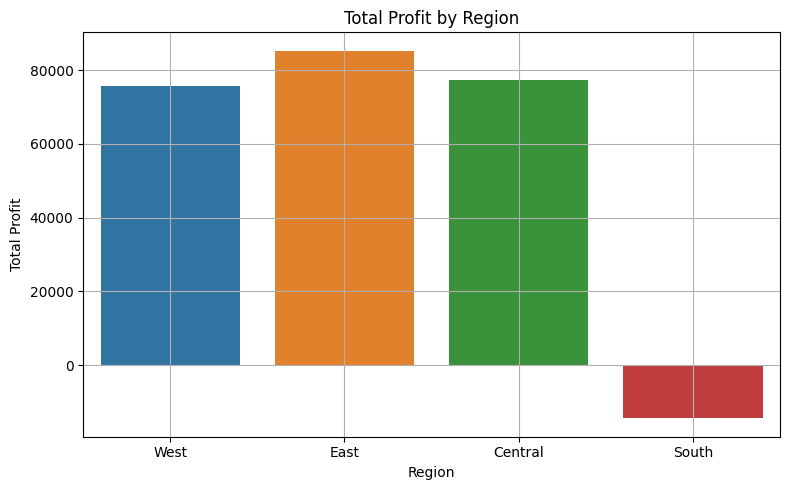

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=orders_df, x='Region', y='Profit', estimator=np.sum, ci=None)
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_14924\3266029180.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Product Category', y='Sales', estimator=np.sum, ci=None, ax=ax[0])
C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_14924\3266029180.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Product Category', y='Profit', estimator=np.sum, ci=None, ax=ax[1])


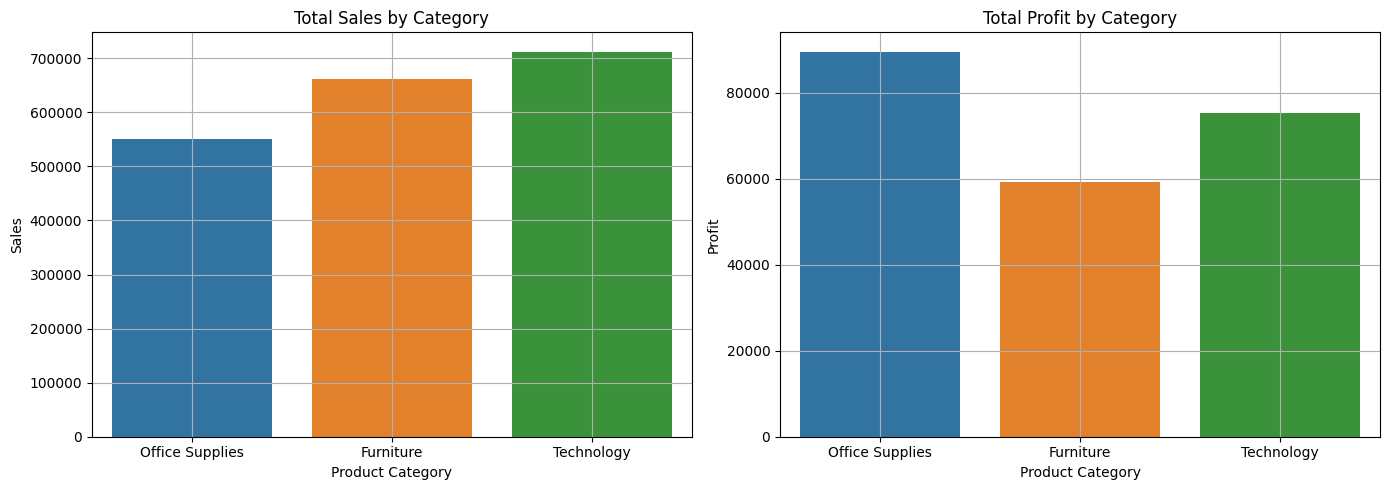

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=orders_df, x='Product Category', y='Sales', estimator=np.sum, ci=None, ax=ax[0])
ax[0].set_title('Total Sales by Category')
ax[0].grid(True)

sns.barplot(data=orders_df, x='Product Category', y='Profit', estimator=np.sum, ci=None, ax=ax[1])
ax[1].set_title('Total Profit by Category')
ax[1].grid(True)

plt.tight_layout()
plt.show()

C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_14924\3862366409.py:8: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
C:\Users\Bartłomiej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


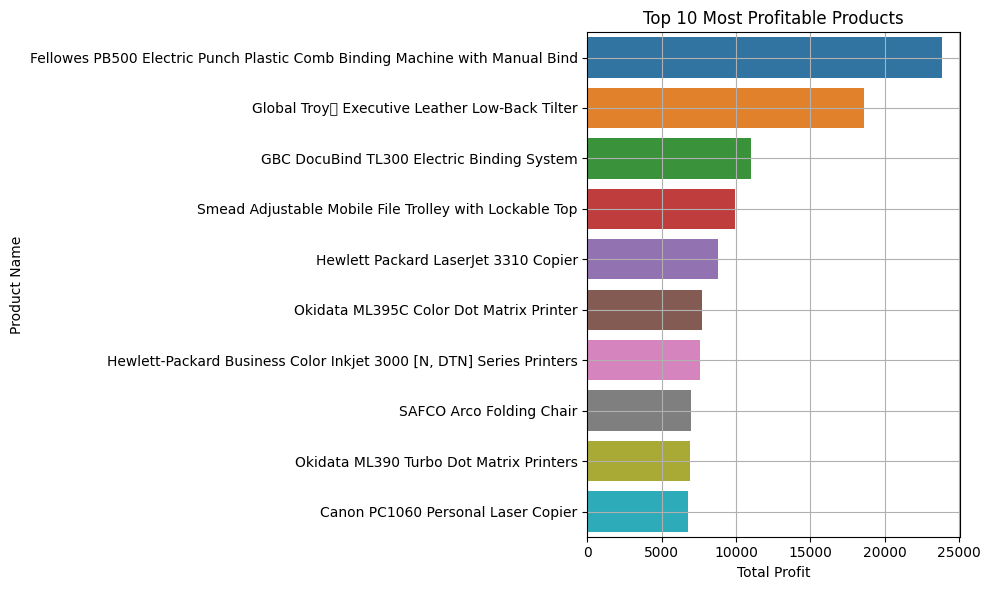

In [8]:
top_products = orders_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, orient='h')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Bartłomiej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bartłomiej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


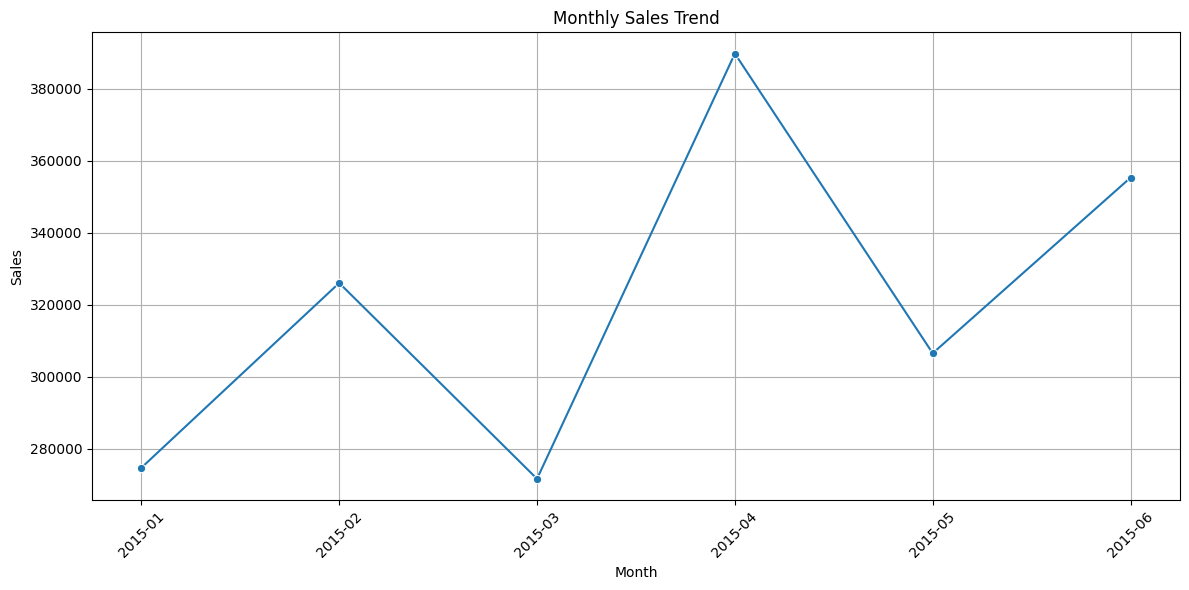

In [18]:
orders_df['Month'] = orders_df['Order Date'].dt.to_period('M')
monthly_sales = orders_df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


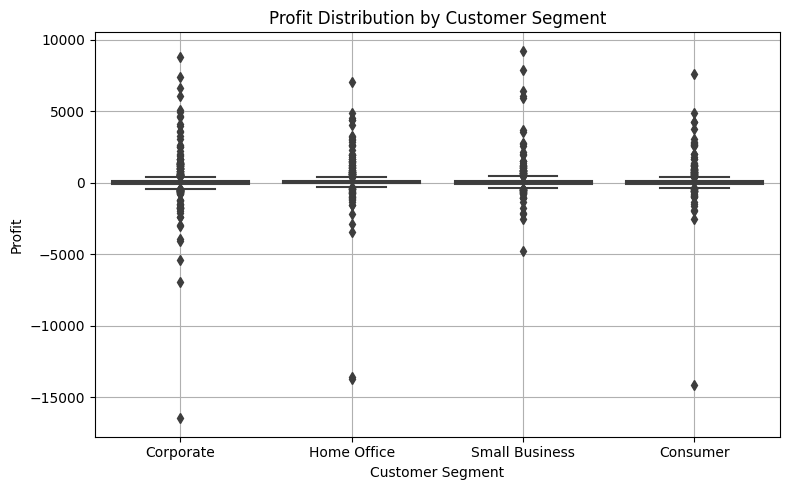

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=orders_df, x='Customer Segment', y='Profit')
plt.title('Profit Distribution by Customer Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
orders_df.columns.sort_values()

Index(['City', 'Country', 'Customer ID', 'Customer Name', 'Customer Segment',
       'Discount', 'Month', 'Order Date', 'Order ID', 'Order Priority',
       'Postal Code', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Quantity ordered new', 'Region', 'Row ID', 'Sales', 'Segment',
       'Ship Date', 'Ship Mode', 'Shipping Cost', 'State or Province',
       'Unit Price', 'Year'],
      dtype='object')

# clustering


In [13]:
scaler = StandardScaler()
features = scaler.fit_transform(orders_df[['Sales', 'Quantity ordered new', 'Discount', 'Profit']])

kmeans = KMeans(n_clusters=4, random_state=42)
orders_df['Segment'] = kmeans.fit_predict(features)

In [14]:
orders_df['Segment'] 

0       1
1       2
2       0
3       0
4       0
       ..
1947    1
1948    0
1949    0
1950    0
1951    0
Name: Segment, Length: 1952, dtype: int32

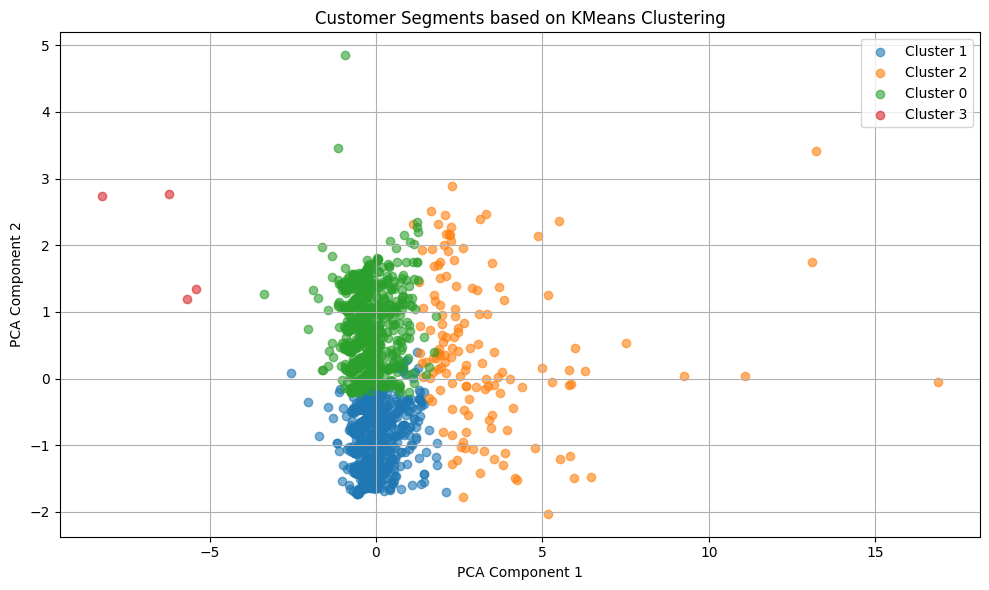

In [27]:

# Reduce dimensions for visualization using only numeric features used for clustering
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)
orders_df['PCA1'] = reduced[:, 0]
orders_df['PCA2'] = reduced[:, 1]

# Plot
plt.figure(figsize=(10, 6))
for cluster in orders_df['Segment'].unique():
    subset = orders_df[orders_df['Segment'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Segments based on KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Prepare data for basket analysis
orders_subset = orders_df[['Order ID', 'Product Name']].dropna()
basket = orders_subset.groupby('Order ID')['Product Name'].apply(list)

# Encode transactions to one-hot format
te = TransactionEncoder()
te_ary = te.fit_transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.2)

# Show results
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift


In [41]:
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift


In [39]:
frequent_itemsets

,support,itemsets
0,0.005861,"(80 Minute Slim Jewel Case CD-R , 10/Pack - St..."
1,0.005861,(Avery 493)
2,0.006593,(Bevis 36 x 72 Conference Tables)
3,0.005128,(Lock-Up Easel 'Spel-Binder')
4,0.005128,(Newell 323)
5,0.005128,(Newell 343)
6,0.005861,(Office Star - Mid Back Dual function Ergonomi...
